<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Brands_Reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
1,2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2,2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
3,2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
4,2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...,...
206245,2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
206246,2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
206247,2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States
206248,2021-03-10 22:35:00,"#COVID19 vaccines are hard to come by, but the...",vaccines hard come theres new way find shot ch...,medicaldaily,New York,"['COVID19', 'COVID19vaccine', 'vaccineregistra...",United States


In [23]:
df.shape
dataset = df.dropna() # drop null values
dataset.shape

(205574, 7)

In [24]:
reactions_keywords= ['fever','chills','headache','neck pain','cold','flu','body pain',
            'body pains','sore arm','arm soreness','arm sore','swollen','injection area',
            'tender arm','cough','coughing','sore throat']
reactionsAndItsKeywords = {'Fever' : ['fever'],
                           'Chills': ['chills'],
                           'Headache' : ['headache'],
                           'Neck pain' : ['neck pain'],
                           'Cold' : ['cold', 'flu'],
                           'Body pains' : ['body pain','body pains'],
                           'Sore arm' : ['sore arm','arm soreness','arm sore','swollen','injection area','tender arm'],
                           'Cough' : ['cough','coughing','sore throat'],
                           'Vomiting' : ['vomiting','throw up', 'nausea']}

# Function to reaction with respect to brands
def getReactions(brand, reactionVsItsCount):
  # passing the reaction through tweets to check the respective brand
  for tweet in df["CleanedTweet"]:
    try:
      if tweet.find(brand) != -1:
        for reaction, keywords in reactionsAndItsKeywords.items():
          for keyword in keywords:
            if(keyword in tweet):
              if reaction not in reactionVsItsCount.keys():
                reactionVsItsCount[reaction] = 1
              else:
                  reactionVsItsCount[reaction] = reactionVsItsCount[reaction]+1
          # reactionVsItsCount[reaction]=count
    except Exception as ex:
      pass
  return reactionVsItsCount
                            

In [25]:
vaccinesAndItsKeyWords = {"Covaxin":['covax','vax','behalf_covax'],
                          "Pfizer":['pfizercovidvaccine','pfizervaccine','pfizer','modernapfizer'],
                          "Moderna" : ['moderna','modernavaccine','teammoderna'],
                          "Johnson&Johnson" : ['borisjohnson','johnson','johnsonandjohnson','johnsonandjohnsonvaccine'],
                          "Covishield" :['covishield']
                          }
reactions=[]
brandVsReactions= {}

for vaccine, keywords  in vaccinesAndItsKeyWords.items():
  reactionsVsCount={}
  for keyword in keywords:
    try:
        reactionsVsCount = getReactions(keyword,reactionsVsCount)
    except:
        print ("Error while checking brand")
  brandVsReactions[vaccine] = reactionsVsCount

print(brandVsReactions)

{'Covaxin': {'Fever': 11, 'Cold': 25, 'Body pains': 6, 'Chills': 5, 'Headache': 6, 'Sore arm': 12, 'Vomiting': 3, 'Cough': 1}, 'Pfizer': {'Sore arm': 216, 'Cold': 75, 'Headache': 111, 'Fever': 91, 'Chills': 51, 'Vomiting': 33, 'Cough': 5}, 'Moderna': {'Cold': 67, 'Vomiting': 21, 'Fever': 74, 'Chills': 58, 'Sore arm': 118, 'Headache': 132, 'Cough': 1}, 'Johnson&Johnson': {'Cold': 30, 'Headache': 41, 'Chills': 37, 'Sore arm': 24, 'Fever': 27, 'Vomiting': 8}, 'Covishield': {'Fever': 7, 'Chills': 1, 'Headache': 1, 'Body pains': 1}}


In [27]:
df = pd.DataFrame(brandVsReactions, index=['Covaxin', 'Pfizer', 'Moderna','Johnson&Johnson','Covishield'])

In [28]:
df= pd.DataFrame.from_dict(brandVsReactions)
df.fillna(0, inplace=True)
df

,Covaxin,Pfizer,Moderna,Johnson&Johnson,Covishield
Fever,11,91.0,74.0,27.0,7.0
Cold,25,75.0,67.0,30.0,0.0
Body pains,6,0.0,0.0,0.0,1.0
Chills,5,51.0,58.0,37.0,1.0
Headache,6,111.0,132.0,41.0,1.0
Sore arm,12,216.0,118.0,24.0,0.0
Vomiting,3,33.0,21.0,8.0,0.0
Cough,1,5.0,1.0,0.0,0.0


In [ ]:

from matplotlib import pyplot as plt

plotdata = pd.DataFrame({
    "Covaxin":df['Covaxin'],
    "Pfizer": df['Pfizer'],
    "Moderna": df['Moderna'],
    "Johnson&Johnson": df['Johnson&Johnson'],
    "Covishield": df['Covishield']
    }, 
    index=["Fever", "Cold", "Bodypains", "Chills", "Headache","Sore arm","Vomiting","Cough"]
)
plotdata.transpose().plot(kind="bar")
plt.figure(figsize=(35, 35))
plt.title("Vaccine vs Reactions Analysis")
plt.xlabel("Vaccine Brands")
plt.ylabel("Reactions")

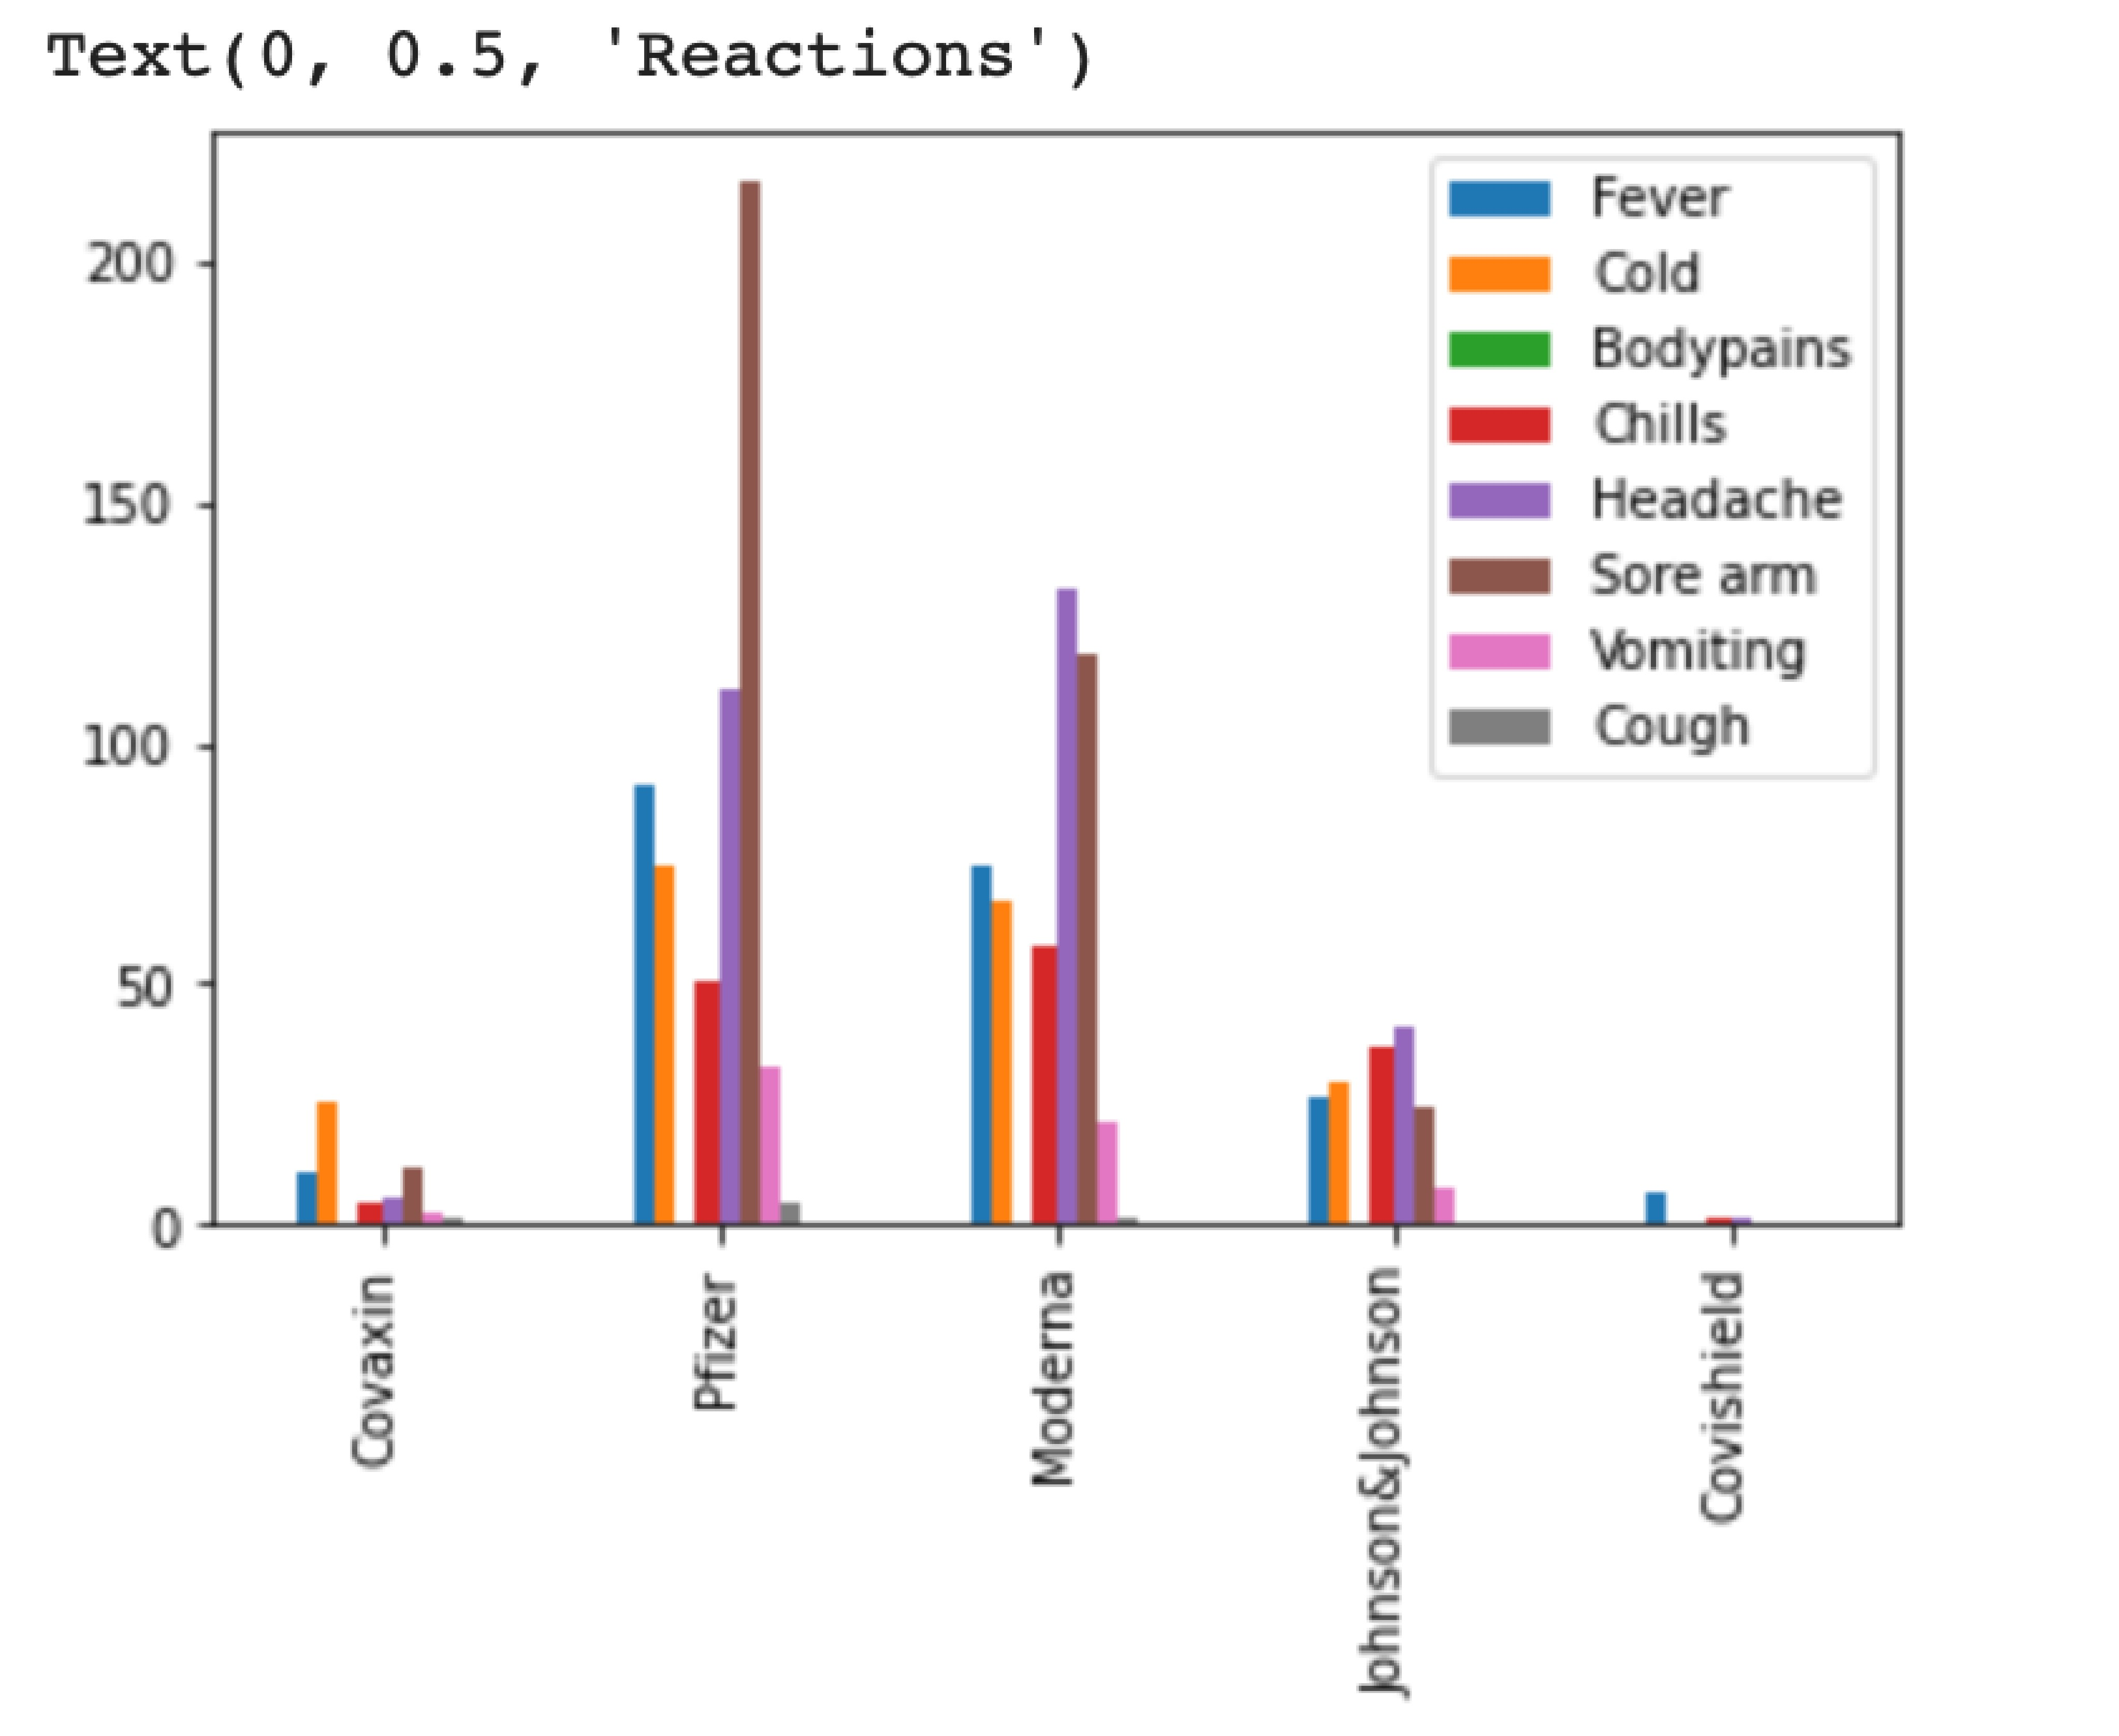